# Setup


In [1]:
# import packages
%run ../global_packages.py

# get the global parameters
%run ../global_pars.py

# import your local functions
sys.path.insert(1, '../')
from global_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

# Paths and Parameters

In [2]:
figpath = 'poster_figures/'

# Get Data

In [3]:
ds_WOD = xr.open_dataset('../data_processing/1_WOD_Coastal/wod_coastal_processed.nc')
ds_WOD

<xarray.Dataset>
Dimensions:                (depth: 97, time_eAS: 22560, time_eBoB: 20458, time_wAS: 30300, time_wBoB: 2419)
Coordinates:
  * time_wAS               (time_wAS) datetime64[ns] 1958-01-16 ... 2020-05-23
  * time_eAS               (time_eAS) datetime64[ns] 1958-01-02 ... 2020-05-31
  * time_wBoB              (time_wBoB) datetime64[ns] 1959-08-20 ... 2020-05-28
  * time_eBoB              (time_eBoB) datetime64[ns] 1958-02-05 ... 2020-05-29
  * depth                  (depth) int64 0 5 10 15 20 ... 4700 4800 4900 5000
Data variables:
    lat_wAS                (time_wAS) float32 ...
    lon_wAS                (time_wAS) float32 ...
    mon_wAS                (time_wAS) int64 ...
    seas_wAS               (time_wAS) int64 ...
    lat_eAS                (time_eAS) float32 ...
    lon_eAS                (time_eAS) float32 ...
    mon_eAS                (time_eAS) int64 ...
    seas_eAS               (time_eAS) int64 ...
    lat_wBoB               (time_wBoB) float32 ...
    lon

In [4]:
# # merge all data
data = np.concatenate((ds_WOD.temp_wAS_50_200,ds_WOD.temp_eAS_50_200,
                       ds_WOD.temp_wBoB_50_200,ds_WOD.temp_eBoB_50_200),0)
tdata = np.concatenate((ds_WOD.time_wAS,ds_WOD.time_eAS,
                       ds_WOD.time_wBoB,ds_WOD.time_eBoB),0)

data = xr.DataArray(data,dims = ['time'],coords =[tdata])

years = np.arange(np.min(data.time.dt.year),np.max(data.time.dt.year)+1)
years

no_temp = np.full((len(years)),0)
for yy,year in enumerate(years):
    ind = data.time.dt.year == year
    
    tmp_data = data[ind]
    no_temp[yy] = len(tmp_data[~np.isnan(tmp_data)])
    

# Domain Plot


Length Oxygen wAS:  629
Min Time wAS:  1960-11-04T00:00:00.000000000
Max Time wAS:  2013-07-05T00:00:00.000000000
Length Oxygen eAS:  1940
Min Time eAS:  1958-11-27T00:00:00.000000000
Max Time eAS:  2020-05-24T00:00:00.000000000
Length Oxygen wBoB:  285
Min Time wBoB:  1961-01-30T00:00:00.000000000
Max Time wBoB:  2018-07-24T00:00:00.000000000
Length Oxygen eBoB:  1073
Min Time eBoB:  1959-09-29T00:00:00.000000000
Max Time eBoB:  2018-07-10T00:00:00.000000000


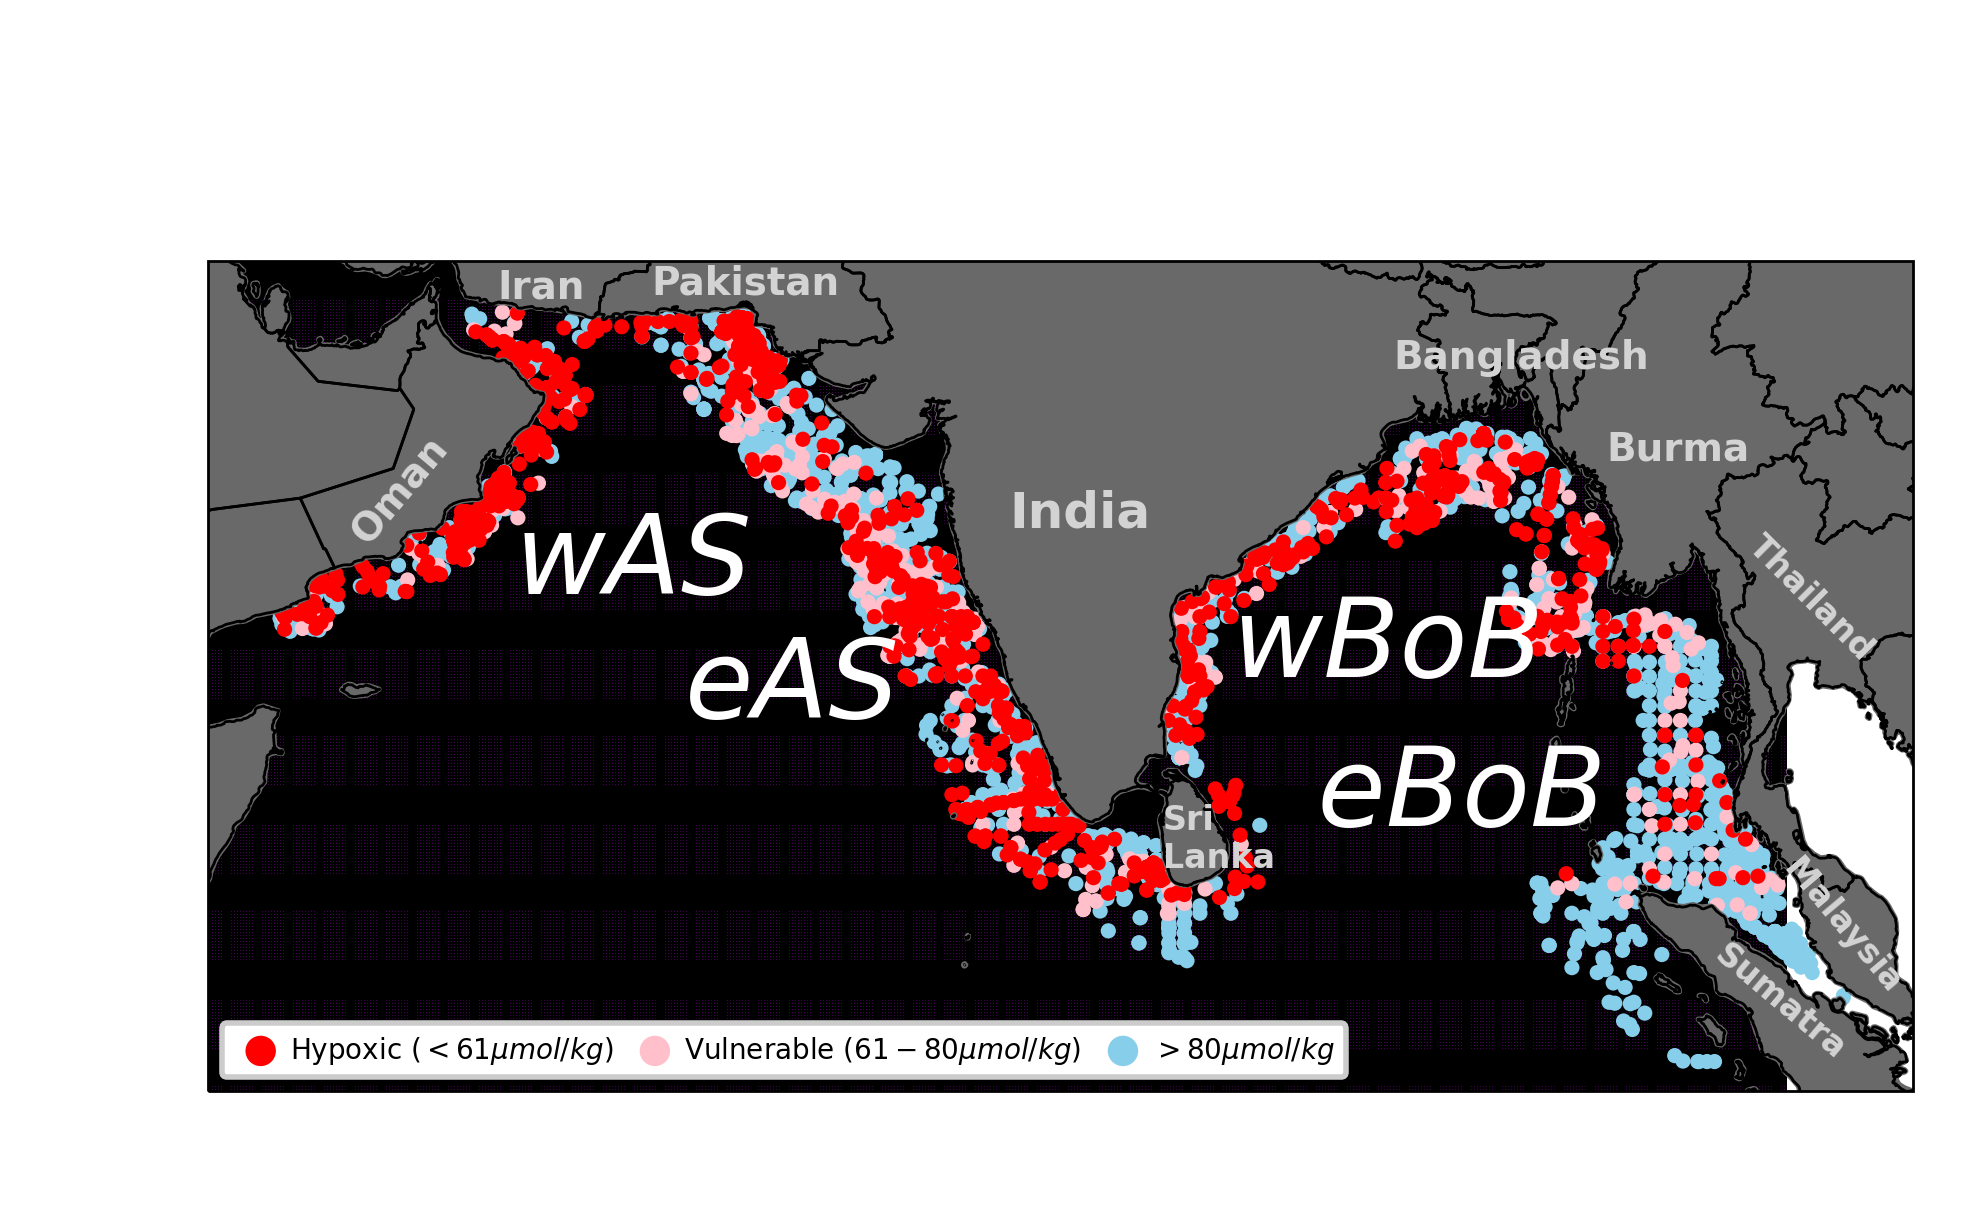

In [5]:
# # Plotting Full Indian Ocean

params = {'legend.fontsize': 5,
         'axes.labelsize': 6,
         'axes.titlesize': 18,
         'xtick.labelsize':6,
         'ytick.labelsize':6}

pylab.rcParams.update(params)
cmap = cmocean.cm.thermal_r

# limits 
cbounds = [49,104,-1,27]
cmin = 20
cmax = 160
sz = 30
# clrs = ['navy','limegreen','deeppink','purple']
clrs = ['crimson','navy','purple','darkgreen']
hyp_clr = '#FEE12B'
sla_clr = '#FEE12B'
lfz = 6
fig = plt.figure(figsize=(5.5,2.75),dpi=400)

#############################################################
#----------------- Oxygen---------------------#
#############################################################
ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
# add_bathy(ax,cbounds)

geolon,geolat = np.meshgrid(np.arange(30,100,.1),np.arange(-10,30,.1))
plt.pcolor(geolon,geolat,np.ones_like(geolon),color='k')

# wAS
ind = ~np.isnan(ds_WOD.doxy_wAS_50_200)
doxy = ds_WOD.doxy_wAS_50_200[ind]
lon = ds_WOD.lon_wAS[ind]
lat = ds_WOD.lat_wAS[ind]

print('Length Oxygen wAS: ', len(doxy))
print('Min Time wAS: ', np.array(np.min(ds_WOD.time_wAS[ind])))
print('Max Time wAS: ', np.array(np.max(ds_WOD.time_wAS[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())



# eAS
ind = ~np.isnan(ds_WOD.doxy_eAS_50_200)
doxy = ds_WOD.doxy_eAS_50_200[ind]
lon = ds_WOD.lon_eAS[ind]
lat = ds_WOD.lat_eAS[ind]

print('Length Oxygen eAS: ', len(doxy))
print('Min Time eAS: ', np.array(np.min(ds_WOD.time_eAS[ind])))
print('Max Time eAS: ', np.array(np.max(ds_WOD.time_eAS[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


# wBoB
ind = ~np.isnan(ds_WOD.doxy_wBoB_50_200)
doxy = ds_WOD.doxy_wBoB_50_200[ind]
lon = ds_WOD.lon_wBoB[ind]
lat = ds_WOD.lat_wBoB[ind]

print('Length Oxygen wBoB: ', len(doxy))
print('Min Time wBoB: ', np.array(np.min(ds_WOD.time_wBoB[ind])))
print('Max Time wBoB: ', np.array(np.max(ds_WOD.time_wBoB[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


# eBoB
ind = ~np.isnan(ds_WOD.doxy_eBoB_50_200)
doxy = ds_WOD.doxy_eBoB_50_200[ind]
lon = ds_WOD.lon_eBoB[ind]
lat = ds_WOD.lat_eBoB[ind]

print('Length Oxygen eBoB: ', len(doxy))
print('Min Time eBoB: ', np.array(np.min(ds_WOD.time_eBoB[ind])))
print('Max Time eBoB: ', np.array(np.max(ds_WOD.time_eBoB[ind])))


ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# land
# g = add_land(ax, bounds = cbounds,countries = True, rivers = False,lcolor = '#b5651d',ccolor = '#ca9852')
g = add_land(ax, bounds = cbounds,countries = True, rivers = False,ccolor = 'k')

# g.xlocator = mticker.FixedLocator(np.arange(60,110,10))
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.xlocator = mticker.FixedLocator([54,78,102])
# add_letter(ax, 'a', x = 0.01,y=0.94, fontsize = lfz, color = 'k')
g.xlabel_style = {'color': 'w'}
g.ylabel_style = {'color': 'w'}
# bathy contour ##############################################

ax.set_title('World Ocean Database\n50-200m Oxygen Values', color = 'w')



# ####### Countries ##############################################
clr = 'lightgray'
add_text(ax, 'India', x = 0.47,y=0.68, fontsize = 9, color = clr, weight = 'bold')
add_text(ax, 'Bangladesh', x = 0.695,y=0.87, fontsize = 7, color = clr, weight = 'bold')
add_text(ax, 'Pakistan', x = 0.26,y=0.96, fontsize = 7, color = clr, weight = 'bold')
add_text(ax, 'Iran', x = 0.17,y=0.955, fontsize = 7, color = clr, weight = 'bold')
add_text(ax, 'Oman', x = 0.08,y=0.66, fontsize = 7, color = clr, rotation = 50, weight = 'bold')
add_text(ax, 'Burma', x = 0.82,y=0.76, fontsize = 7, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Thailand', x = 0.9,y=0.52, fontsize = 6, color = clr, rotation = -45, weight = 'bold')
add_text(ax, 'Malaysia', x = .92,y=0.12, fontsize = 6, color = clr, rotation = -50, weight = 'bold')
add_text(ax, 'Sumatra', x = 0.88,y=0.04, fontsize = 6, color = clr, rotation = -40, weight = 'bold')
add_text(ax, 'Sri\nLanka', x = 0.56,y=0.27, fontsize = 6, color = clr, weight = 'bold')

# Seas
# add_text(ax, ' Bay of \nBengal', x = 0.65,y=0.4, fontsize = 10, color = 'gray', style='italic')
# add_text(ax, 'Arabian\n  Sea', x = 0.2,y=0.4, fontsize = 10, color = 'gray', style='italic')

# regions
add_text(ax, ' wBoB', x = 0.58,y=0.5, fontsize = 20, color = 'w', style='italic')
add_text(ax, ' eBoB', x = 0.63,y=0.32, fontsize = 20, color = 'w', style='italic')
add_text(ax, 'wAS', x = 0.18,y=0.6, fontsize = 20, color = 'w', style='italic')
add_text(ax, 'eAS', x = 0.28,y=0.45, fontsize = 20, color = 'w', style='italic')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Hypoxic ($<61 \mu mol/kg$)')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Vulnerable ($61-80 \mu mol/kg$)')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = '$>80 \mu mol/kg$')


l = ax.legend(loc='lower left',
              markerscale = 2,ncol = 3, columnspacing = 0.5,
              facecolor = 'w',framealpha=1,handletextpad=0.05, 
              labelspacing = 0.75);
